# 4 Load Balancer 

In [1]:
import random 
Servers = ["Server1", "Server2" , "Server3"]

class RoundRobin():
    def __init__(self, servers):
        self.servers = Servers
        self.current_index = 0
    
    def get_server(self):
        server = self.servers[self.current_index]
        self.current_index = (self.current_index + 1) % len(self.servers)
        return server
    
class Random():
    def __init__(self, servers):
        self.servers = Servers
        
    def get_server(self):
        return random.choice(self.servers)
    
def stimulate_requests(load_balancer, num_requests):
    for i in  range(1, num_requests + 1):
        server = load_balancer.get_server()
        print(f"Request {i} routed to {server}")
        
if __name__ == '__main__':
    print("Round Robin Load Balancer")
    round_robin_lb = RoundRobin(Servers)
    stimulate_requests(round_robin_lb, 10)
    
    print("\nRandom Load Balancer")
    random_lb = Random(Servers)
    stimulate_requests(random_lb, 10)

Round Robin Load Balancer
Request 1 routed to Server1
Request 2 routed to Server2
Request 3 routed to Server3
Request 4 routed to Server1
Request 5 routed to Server2
Request 6 routed to Server3
Request 7 routed to Server1
Request 8 routed to Server2
Request 9 routed to Server3
Request 10 routed to Server1

Random Load Balancer
Request 1 routed to Server1
Request 2 routed to Server1
Request 3 routed to Server3
Request 4 routed to Server1
Request 5 routed to Server2
Request 6 routed to Server1
Request 7 routed to Server3
Request 8 routed to Server3
Request 9 routed to Server2
Request 10 routed to Server2


# 5) 
Clonal 

Generation 1: Best Fitness = 1.84001
Generation 2: Best Fitness = 1.84001
Generation 3: Best Fitness = 1.84001
Generation 4: Best Fitness = 1.84001
Generation 5: Best Fitness = 1.84001
Generation 6: Best Fitness = 1.84001
Generation 7: Best Fitness = 1.84001
Generation 8: Best Fitness = 1.84001
Generation 9: Best Fitness = 1.84001
Generation 10: Best Fitness = 1.84001
Generation 11: Best Fitness = 1.84001
Generation 12: Best Fitness = 1.84001
Generation 13: Best Fitness = 1.84001
Generation 14: Best Fitness = 1.84001
Generation 15: Best Fitness = 1.84001
Generation 16: Best Fitness = 1.84001
Generation 17: Best Fitness = 1.84001
Generation 18: Best Fitness = 1.84001
Generation 19: Best Fitness = 1.84001
Generation 20: Best Fitness = 1.84001
Generation 21: Best Fitness = 1.84001
Generation 22: Best Fitness = 1.84001
Generation 23: Best Fitness = 1.84001
Generation 24: Best Fitness = 1.84001
Generation 25: Best Fitness = 1.84001
Generation 26: Best Fitness = 1.84001
Generation 27: Best F

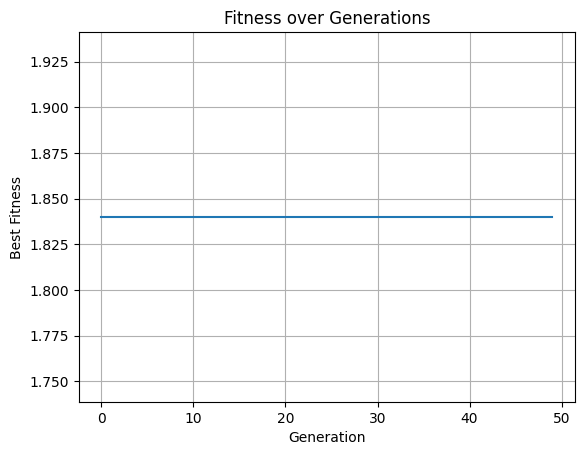

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Objective Function
def objective_function(x):
    return x * np.sin(10 * np.pi * x) + 1.0

# Parameters
population_size = 20
num_generations = 50
clone_factor = 5
mutation_rate = 0.1
dimension = 1
lower_bound, upper_bound = 0.0, 1.0

# Initialize population
def initialize_population():
    return np.random.uniform(lower_bound, upper_bound, (population_size, dimension))

# Evaluate population fitness
def evaluate_population(population):
    return np.array([objective_function(ind[0]) for ind in population])

# Clone best individuals
def clone_population(population, fitness):
    sorted_indices = np.argsort(-fitness)
    clones = []
    for i in sorted_indices:
        num_clones = int(clone_factor)
        clones += [population[i].copy() for _ in range(num_clones)]
    return np.array(clones)

# Hypermutation (inverse to fitness)
def hypermutate(clones, fitness):
    max_fitness = max(fitness)
    mutated = []
    for i, clone in enumerate(clones):
        rate = mutation_rate * (1 - (fitness[i] / max_fitness))
        mutation = np.random.normal(0, rate, size=dimension)
        new_clone = np.clip(clone + mutation, lower_bound, upper_bound)
        mutated.append(new_clone)
    return np.array(mutated)

# Selection
def select_population(mutated_clones, population_size):
    fitness = evaluate_population(mutated_clones)
    sorted_indices = np.argsort(-fitness)
    return mutated_clones[sorted_indices[:population_size]]

# CSA Main Loop
def clonal_selection_algorithm():
    population = initialize_population()
    best_fitness_over_time = []

    for gen in range(num_generations):
        fitness = evaluate_population(population)
        clones = clone_population(population, fitness)
        clone_fitness = evaluate_population(clones)
        mutated_clones = hypermutate(clones, clone_fitness)
        population = select_population(mutated_clones, population_size)
        best_fitness = np.max(evaluate_population(population))
        best_fitness_over_time.append(best_fitness)
        print(f"Generation {gen+1}: Best Fitness = {best_fitness:.5f}")

    return population, best_fitness_over_time

# Run
final_population, fitness_curve = clonal_selection_algorithm()

# Plot
plt.plot(fitness_curve)
plt.title("Fitness over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid()
plt.show()


In [3]:
import random
import math

# Objective Function (You can change this to your problem)
def objective_function(x):
    return x * math.sin(10 * math.pi * x) + 1

# Create a random antibody (solution)
def create_antibody():
    return random.uniform(0, 1)

# Mutate an antibody slightly
def mutate(antibody, mutation_rate=0.1):
    mutated = antibody + random.uniform(-mutation_rate, mutation_rate)
    # Keep x within [0,1]
    return max(0, min(1, mutated))

# Clonal Selection Algorithm
def clonal_selection_algorithm(population_size=10, clones_per_antibody=5, generations=25):
    # Initialize population
    population = [create_antibody() for _ in range(population_size)]

    for generation in range(generations):
        print(f"\nGeneration {generation+1}")
        
        # Evaluate fitness
        fitness = [objective_function(antibody) for antibody in population]
        
        # Select best antibodies (high fitness)
        selected = [x for _, x in sorted(zip(fitness, population), reverse=True)][:population_size//2]

        clones = []
        for antibody in selected:
            # Clone and mutate
            for _ in range(clones_per_antibody):
                clone = mutate(antibody)
                clones.append(clone)

        # Evaluate clones
        clone_fitness = [objective_function(clone) for clone in clones]
        
        # Select best antibodies from clones
        best_clones = [x for _, x in sorted(zip(clone_fitness, clones), reverse=True)][:population_size]
        
        # Replace population with best clones
        population = best_clones
        
        # Print the best antibody so far
        best = max(population, key=lambda x: objective_function(x))
        print(f"Best solution: x = {best:.4f}, fitness = {objective_function(best):.4f}")

    # Return the best solution
    best = max(population, key=lambda x: objective_function(x))
    return best, objective_function(best)

if __name__ == "__main__":
    best_solution, best_fitness = clonal_selection_algorithm()
    print("\n=== Final Best Solution ===")
    print(f"x = {best_solution:.4f}, fitness = {best_fitness:.4f}")


Generation 1
Best solution: x = 0.8603, fitness = 1.8156

Generation 2
Best solution: x = 0.8467, fitness = 1.8421

Generation 3
Best solution: x = 0.8478, fitness = 1.8458

Generation 4
Best solution: x = 0.8506, fitness = 1.8505

Generation 5
Best solution: x = 0.8573, fitness = 1.8351

Generation 6
Best solution: x = 0.8507, fitness = 1.8505

Generation 7
Best solution: x = 0.8595, fitness = 1.8212

Generation 8
Best solution: x = 0.8508, fitness = 1.8505

Generation 9
Best solution: x = 0.8510, fitness = 1.8506

Generation 10
Best solution: x = 0.8573, fitness = 1.8347

Generation 11
Best solution: x = 0.8550, fitness = 1.8445

Generation 12
Best solution: x = 0.8513, fitness = 1.8506

Generation 13
Best solution: x = 0.8580, fitness = 1.8309

Generation 14
Best solution: x = 0.8539, fitness = 1.8475

Generation 15
Best solution: x = 0.8567, fitness = 1.8378

Generation 16
Best solution: x = 0.8502, fitness = 1.8502

Generation 17
Best solution: x = 0.8388, fitness = 1.7874

Gener

# 7 AIPR

In [4]:
# healthy: Generated using a normal distribution with a mean (loc) of 0.2 and a standard deviation (scale) of 0.1. These are for healthy structures.

# damaged: Generated using a normal distribution with a mean of 0.8 and a standard deviation of 0.2. These are for damaged structures.
    

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# getting synthetic structural data 
def generate_data(n_samples = 100):
    healthy = np.random.normal(loc=0.2, scale=0.1, size=(n_samples//2, 10))
    damaged = np.random.normal(loc=0.8, scale=0.2, size=(n_samples//2, 10))
    
    X = np.vstack((healthy, damaged)) # input feature of both
    # label of both samples
    y = np.array([0] * (n_samples//2) + [1] * (n_samples//2))
    # 0=healthy, 1=damaged
    return X, y

# AIS Classifier
class SimpleAIS:
    def __init__(self, n_clones=5, mutation_rate=0.1, n_generations=10):
        self.n_clones = n_clones
        self.mutation_rate = mutation_rate
        self.n_generations = n_generations

    def affinity(self, a, b):
        # Euclidean distance (lower = better match)
        return np.linalg.norm(a - b)

    def train(self, X, y):
        self.memory_cells = []
        for label in np.unique(y):
            class_samples = X[y == label]
            prototype = np.mean(class_samples, axis=0)
            self.memory_cells.append((label, prototype))

    def predict(self, X):
        predictions = []
        for sample in X:
            distances = [self.affinity(sample, cell[1]) for cell in self.memory_cells]
            label = self.memory_cells[np.argmin(distances)][0]
            predictions.append(label)
        return np.array(predictions)

# Step 3: Run the model
X, y = generate_data(200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SimpleAIS()
model.train(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Healthy", "Damaged"]))    

=== Classification Report ===
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        21
     Damaged       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# 8) 
DEAP Distributed Evolutionary Algorithms using Python

In [5]:
import random
from deap import base, creator, tools, algorithms

In [6]:
def eval_func(individual):
    return sum(x**2 for x in individual),

In [7]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [8]:
toolbox = base.Toolbox()

In [9]:
toolbox.register("attr_float", random.uniform, -5.0, 5.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [10]:
# Evaluation function and genetic operators
toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [11]:
# Create population
population = toolbox.population(n=50)

In [12]:
# Genetic Algorithm parameters
generations = 20

In [13]:
# Run the algorithm
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))

In [14]:
# Get the best individual after generations
best_ind = tools.selBest(population, k=1)[0]
best_fitness = best_ind.fitness.values[0]
 
print("Best individual:", best_ind)
print("Best fitness:", best_fitness)

Best individual: [0.010183579756309182, -0.03852453600660719, -0.043813555647169024]
Best fitness: 0.0035074728296250607


In [15]:
print("Best individual:", [round(val, 3) for val in best_ind])
print("Best fitness:", round(best_fitness, 3))

Best individual: [0.01, -0.039, -0.044]
Best fitness: 0.004


# 10)
Ant Colony for Travelling Salesman

In [37]:
import numpy as np
import random

In [49]:
distance_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

In [50]:
num_ants = 10
num_iterations = 50
evaporation_rate = 0.5
pheromone_constant = 1.0
heuristic_constant = 1.0

In [51]:
num_cities = len(distance_matrix)
pheromone = np.ones((num_cities, num_cities))
visibility = 1 / distance_matrix

C:\Users\Neha\AppData\Local\Temp\ipykernel_21120\2933138830.py:3: RuntimeWarning: divide by zero encountered in divide
  visibility = 1 / distance_matrix


In [52]:
# ACO 

for iteration in range(num_iterations):
    ant_routes = []
    for ant in range(num_ants):
        current_city = random.randint(0, num_cities - 1)
        visited_cities = [current_city]
        route = [current_city]
        
        while len(visited_cities) < num_cities:
            probabilities = []
            for city in range(num_cities):
                if city not in visited_cities:
                    pheromone_value = pheromone[current_city][city]
                    visibility_value = visibility[current_city][city]
                    probability = (pheromone_value ** pheromone_constant) * (visibility_value ** heuristic_constant)
                    probabilities.append((city, probability))
            
            probabilities = sorted(probabilities, key=lambda x: x[1], reverse=True)
            selected_city = probabilities[0][0]
            route.append(selected_city)
            visited_cities.append(selected_city)
            current_city = selected_city
        
        ant_routes.append(route)
        
        # Update pheromone levels
    delta_pheromone = np.zeros((num_cities, num_cities))
    for ant, route in enumerate(ant_routes):
        for i in range(len(route) - 1):
            city_a = route[i]
            city_b = route[i + 1]
            delta_pheromone[city_a][city_b] += 1 / distance_matrix[city_a][city_b]
            delta_pheromone[city_b][city_a] += 1 / distance_matrix[city_a][city_b]
    
    pheromone = (1 - evaporation_rate) * pheromone + delta_pheromone

In [53]:
# Find the best route
best_route_index = np.argmax([sum(distance_matrix[cities[i]][cities[(i + 1) % num_cities]] for i in range(num_cities)) for cities in ant_routes])
best_route = ant_routes[best_route_index]
shortest_distance = sum(distance_matrix[best_route[i]][best_route[(i + 1) % num_cities]] for i in range(num_cities))

In [54]:
print("Best route:", best_route)
print("Shortest distance:", shortest_distance)

Best route: [0, 1, 3, 2]
Shortest distance: 80
